**Data Source:** Pleschberger, Martin, Zernig, Anja, & Kaestner, Andre. (2020). Equipment Sensor Data from Semiconductor Frontend Production (Version 1) [Data set]. Zenodo. http://doi.org/10.5281/zenodo.4282611

In [1]:
import os
import pandas as pd
pd.options.display.max_columns = 100
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ls

DataSetDescription.txt  equipment2.csv  semiTool.ipynb
equipment1.csv          response.csv


In [3]:
sensors_1_to_24 = pd.read_csv('equipment1.csv', sep=';')
sensors_25_to_56 = pd.read_csv('equipment2.csv', sep=';')
response = pd.read_csv('response.csv', sep=';')

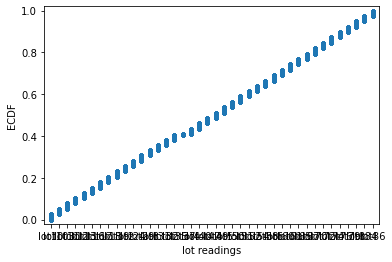

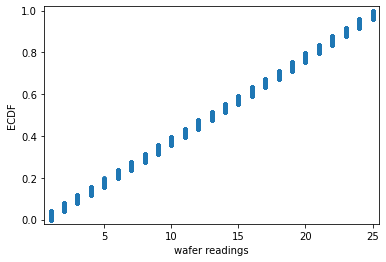

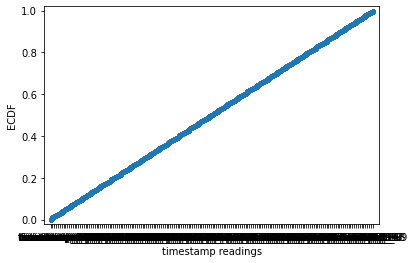

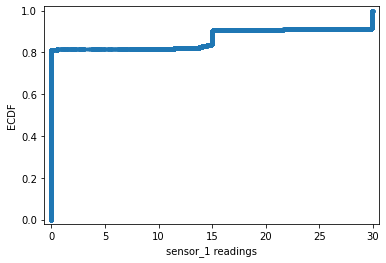

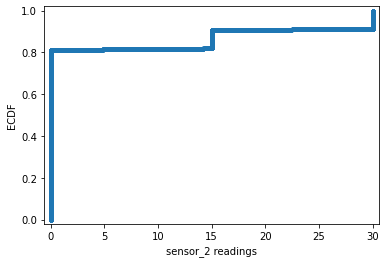

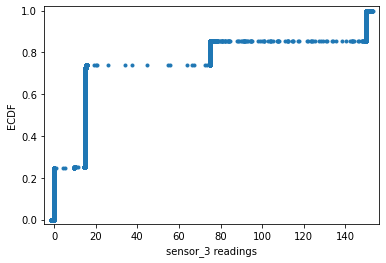

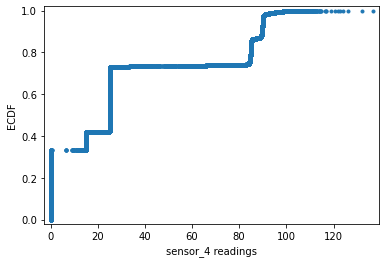

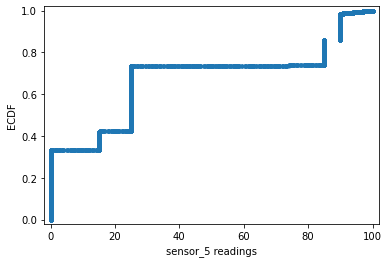

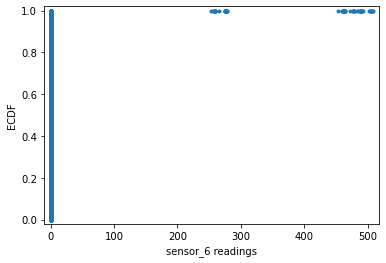

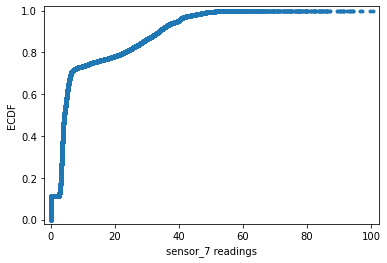

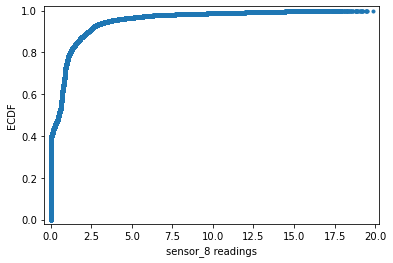

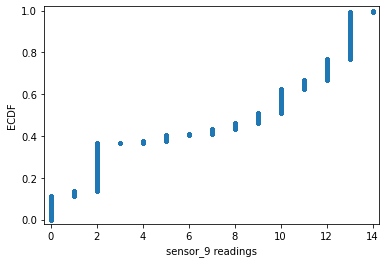

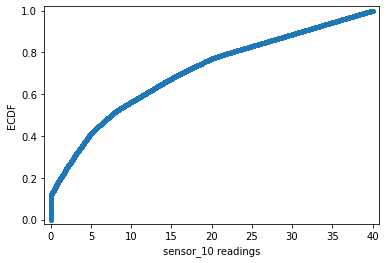

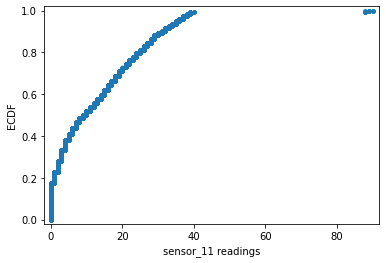

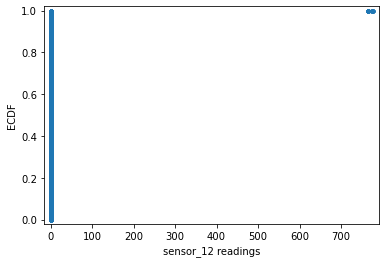

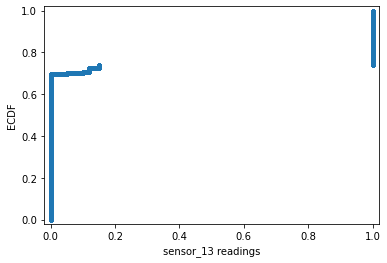

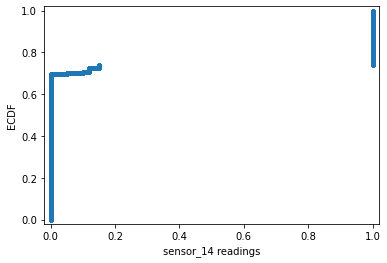

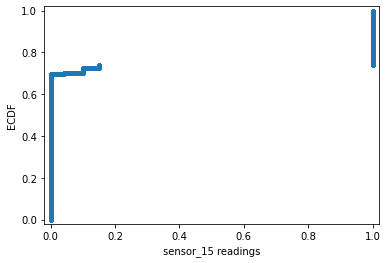

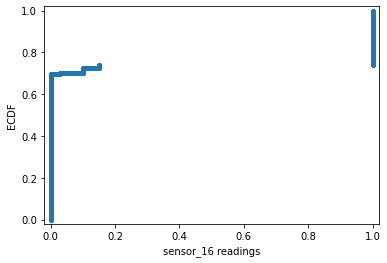

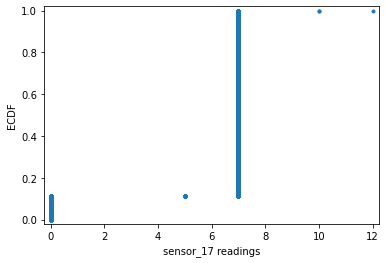

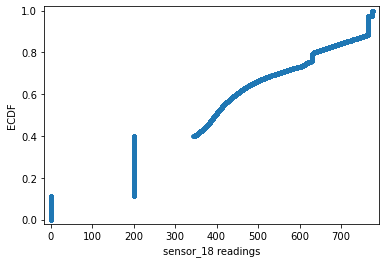

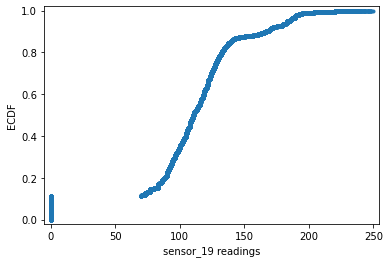

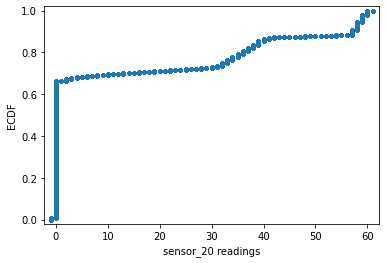

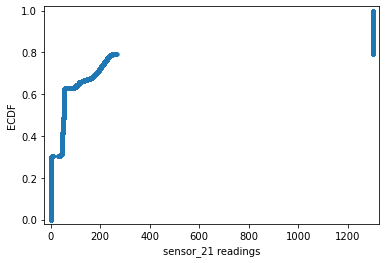

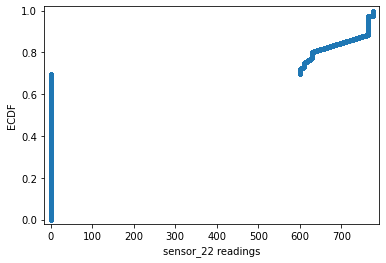

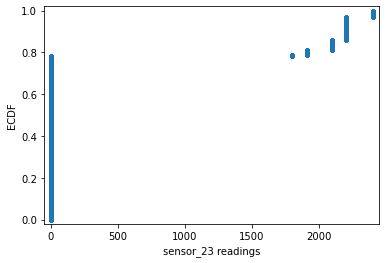

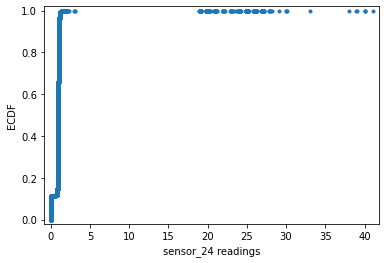

In [4]:
sensor_data = sensors_1_to_24[:]
sensor_data.dtypes
for n in sensor_data.columns:
    x = np.sort(sensor_data[n])
    y = np.arange(1, len(x)+1) / len(x)
    x_ecdf = plt.plot(x, y, marker='.', linestyle='none')
    plt.xlabel('%s readings' %n)
    plt.ylabel('ECDF')
    plt.margins(0.02)
    plt.show()

In [5]:
sensor_data = pd.concat([sensors_1_to_24, sensors_25_to_56], axis=1)
#pd.merge(sensors_1_to_24, sensors_25_to_56, on='timestamp',how='outer')

sensor_data.describe()

,wafer,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,wafer,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,sensor_52,sensor_53,sensor_54,sensor_55,sensor_56
count,170896.000000,170896.000000,170896.000000,170896.000000,170896.000000,170896.000000,170896.000000,170896.000000,1.708960e+05,170896.000000,170896.000000,170896.000000,170896.000000,170896.000000,170896.000000,170896.000000,170896.000000,170896.000000,170896.000000,170896.000000,170896.000000,170896.000000,170896.000000,170896.000000,170896.000000,232144.000000,232144.000000,232144.000000,232144.000000,232144.000000,232144.000000,232144.000000,232144.000000,232144.000000,232144.000000,2.321440e+05,232144.000000,232144.000000,232144.000000,232144.000000,232144.000000,232144.000000,232144.000000,232144.000000,232144.000000,232144.000000,232144.000000,232144.000000,232144.000000,232144.000000,232144.000000,232144.000000,232144.000000,232144.000000,232144.000000,232144.000000,232144.000000,232144.000000
mean,13.109166,4.067866,4.121005,37.679053,32.396468,32.348691,0.137369,10.663262,9.620587e-01,7.350330,11.727677,12.926142,0.296606,0.263935,0.263935,0.263554,0.263539,6.213089,394.627237,106.444442,13.367926,313.857465,210.804377,469.115216,0.951073,13.072782,0.001403,154.539367,61.388629,7.010709,0.001700,20.873311,10.445576,75.038648,0.000202,1.861484e-03,38.326207,0.000207,23.872753,41.882245,39.580997,189.514677,2.650611,122.333376,124.302022,1.040673,453.448962,30.591545,783.977135,15.756765,176.676296,30.255056,175.282816,123.584465,198.086621,195.264637,0.541985,0.617882
std,7.227844,9.150628,9.211179,50.805718,34.610954,34.747412,7.639594,13.011113,1.909727e+00,5.011755,11.534396,12.842597,15.090291,0.435423,0.435423,0.435560,0.435568,2.210566,241.168262,47.239928,21.222984,505.929481,321.764011,894.762503,1.252060,7.226085,0.001864,156.651277,48.269289,5.525500,0.003756,24.637101,13.512858,110.904908,0.014227,2.045346e-03,30.134758,0.014378,34.524242,62.431198,58.846435,281.264269,4.268604,96.188806,97.736401,0.896153,454.283538,42.398934,797.362803,21.957669,245.561513,42.467344,244.683230,97.171567,319.181798,316.972509,0.646641,0.488382
min,1.000000,-0.063558,0.000000,-1.672790,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,14.573200,0.000000,0.000000,0.000000,3.339950,8.150137e-17,2.000000,2.040000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,200.000000,92.471100,0.000000,0.500000,0.000000,-1.000000,0.940000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.000000,0.000000,0.000000,15.033400,24.999900,25.000000,0.000000,4.261595,4.882960e-01,9.000000,7.550000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,396.667000,110.538000,0.000000,52.000000,0.000000,-1.000000,1.000000,13.000000,0.000000,102.096000,99.000000,11.000000,0.000000,0.000000,0.027826,0.616062,0.000000,8.239451e-07,61.964630,0.000000,1.

In [6]:
sensor_data.head()

,lot,wafer,timestamp,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,lot,wafer,timestamp,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,sensor_52,sensor_53,sensor_54,sensor_55,sensor_56
0,lot2,1.0,timestamp_0,0.0,0.0,15.1604,105.4170,99.18,0.0,2.77728,0.0,1.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,7.0,200.0,151.891,0.0,47.5,0.0,-1.0,19.05,lot2,1,timestamp_0,0.0,382.64,99.0,11.0,0.0,0.0,0.305503,1.443347,0.0,1.852033e-07,61.93445,0.0,0.518815,0.402844,0.805689,0.762963,0.634785,197.3937,201.8799,1.0,1135.382,0.0,2177.084,0.0,1.0,-0.1,1.8,199.7436,724.5978,0.000009,1.302417,1.00
1,lot2,1.0,timestamp_1,0.0,0.0,15.0920,100.5100,98.18,0.0,2.77465,0.0,1.0,0.91,4.0,0.0,0.0,0.0,0.0,0.0,7.0,200.0,151.402,0.0,48.5,0.0,-1.0,0.99,lot2,1,timestamp_1,0.0,382.64,99.0,11.0,0.0,0.0,0.304918,1.446451,0.0,1.852033e-07,61.93172,0.0,0.518815,0.439466,0.732444,0.762963,0.439466,197.3937,201.9105,1.0,1135.382,0.0,2177.084,0.0,1.0,-0.1,1.8,199.6521,724.5978,0.000008,1.304668,1.18
2,lot2,1.0,timestamp_2,0.0,0.0,15.0432,95.3093,95.18,0.0,2.86352,0.0,1.0,1.91,3.0,0.0,0.0,0.0,0.0,0.0,7.0,200.0,149.815,0.0,48.0,0.0,-1.0,0.99,lot2,1,timestamp_2,0.0,382.64,99.0,11.0,0.0,0.0,0.307562,1.451922,0.0,1.852033e-07,61.92657,0.0,0.518815,0.439466,0.732444,0.762963,0.488296,197.4242,201.9105,1.0,1135.382,0.0,2177.084,0.0,1.0,-0.1,1.8,199.7436,724.5978,0.000008,1.302417,0.93
3,lot2,1.0,timestamp_3,0.0,0.0,15.0334,94.7234,93.18,0.0,3.27855,0.0,1.0,2.91,2.0,0.0,0.0,0.0,0.0,0.0,7.0,200.0,150.182,0.0,48.0,0.0,-1.0,1.10,lot2,1,timestamp_3,0.0,382.64,99.0,11.0,0.0,0.0,0.306975,1.442399,0.0,1.853098e-07,61.94537,0.0,0.518815,0.402844,0.805689,0.762963,0.610370,197.4548,201.8799,1.0,1135.382,0.0,2177.084,0.0,1.0,-0.1,1.8,199.7131,724.5978,0.000008,1.302417,0.94
4,lot2,1.0,timestamp_4,0.0,0.0,15.0432,91.9401,91.18,0.0,3.48645,0.0,1.0,3.91,1.0,0.0,0.0,0.0,0.0,0.0,7.0,200.0,150.182,0.0,47.5,0.0,-1.0,0.89,lot2,1,timestamp_4,0.0,382.64,99.0,11.0,0.0,0.0,0.305274,1.445832,0.0,1.854164e-07,62.02713,0.0,0.488296,0.512711,0.659200,0.762963,0.488296,197.4548,201.8799,1.0,1135.382,0.0,2177.084,0.0,1.0,-0.1,1.8,199.7742,724.5978,0.000008,1.302417,1.03


In [7]:
for n in sensor_data.columns:
    x = np.sort(sensor_data[n])
    y = np.arange(1, len(x)+1) / len(x)
    x_ecdf = plt.plot(x, y, marker='.', linestyle='none')
    plt.xlabel('%s readings' %n)
    plt.ylabel('ECDF')
    plt.margins(0.02)
    plt.show()

TypeError: '<' not supported between instances of 'str' and 'float'

In [8]:
pd.get_dummies(sensor_data, columns=['lot'])

,wafer,timestamp,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,wafer,timestamp,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,...,lot_lot13,lot_lot15,lot_lot16,lot_lot17,lot_lot18,lot_lot19,lot_lot2,lot_lot21,lot_lot24,lot_lot25,lot_lot27,lot_lot29,lot_lot3,lot_lot31,lot_lot32,lot_lot33,lot_lot35,lot_lot36,lot_lot37,lot_lot4,lot_lot40,lot_lot46,lot_lot47,lot_lot49,lot_lot5,lot_lot50,lot_lot51,lot_lot52,lot_lot53,lot_lot54,lot_lot58,lot_lot6,lot_lot60,lot_lot61,lot_lot63,lot_lot65,lot_lot67,lot_lot7,lot_lot70,lot_lot71,lot_lot72,lot_lot74,lot_lot75,lot_lot76,lot_lot79,lot_lot8,lot_lot81,lot_lot84,lot_lot86,lot_lot9
0,1.0,timestamp_0,0.0,0.0,15.1604,105.4170,99.18,0.0,2.77728,0.0,1.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,7.0,200.0,151.891,0.0,47.5,0.0,-1.0,19.05,1,timestamp_0,0.0,382.64,99.0,11.0,0.0,0.0,0.305503,1.443347,0.0,1.852033e-07,61.93445,0.0,0.518815,0.402844,0.805689,0.762963,0.634785,197.3937,201.8799,1.0,1135.382,0.0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,timestamp_1,0.0,0.0,15.0920,100.5100,98.18,0.0,2.77465,0.0,1.0,0.91,4.0,0.0,0.0,0.0,0.0,0.0,7.0,200.0,151.402,0.0,48.5,0.0,-1.0,0.99,1,timestamp_1,0.0,382.64,99.0,11.0,0.0,0.0,0.304918,1.446451,0.0,1.852033e-07,61.93172,0.0,0.518815,0.439466,0.732444,0.762963,0.439466,197.3937,201.9105,1.0,1135.382,0.0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,timestamp_2,0.0,0.0,15.0432,95.3093,95.18,0.0,2.86352,0.0,1.0,1.91,3.0,0.0,0.0,0.0,0.0,0.0,7.0,200.0,149.815,0.0,48.0,0.0,-1.0,0.99,1,timestamp_2,0.0,382.64,99.0,11.0,0.0,0.0,0.307562,1.451922,0.0,1.852033e-07,61.92657,0.0,0.518815,0.439466,0.732444,0.762963,0.488296,197.4242,201.9105,1.0,1135.382,0.0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,timestamp_3,0.0,0.0,15.0334,94.7234,93.18,0.0,3.27855,0.0,1.0,2.91,2.0,0.0,0.0,0.0,0.0,0.0,7.0,200.0,150.182,0.0,48.0,0.0,-1.0,1.10,1,timestamp_3,0.0,382.64,99.0,11.0,0.0,0.0,0.306975,1.442399,0.0,1.853098e-07,61.94537,0.0,0.518815,0.402844,0.805689,0.762963,0.610370,197.4548,201.8799,1.0,1135.382,0.0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,timestamp_4,0.0,0.0,15.0432,91.9401,91.18,0.0,3.48645,0.0,1.0,3.91,1.0,0.0,0.0,0.0,0.0,0.0,7.0,200.0,150.182,0.0,47.5,0.0,-1.0,0.89,1,timestamp_4,0.0,382.64,99.0,11.0,0.0,0.0,0.305274,1.445832,0.0,1.854164e-07,62.02713,0.0,0.488296,0.512711,0.659200,0.762963,0.488296,197.4548,201.8799,1.0,1135.382,0.0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,timestamp_171,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000e+00,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0,0.000,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
232140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,timestamp_172,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.000

In [ ]:
#Split data into train and test
##X_train, X_test, y_train, y_test = train_test_split()

In [ ]:
#edafoofoo1.hist(range=(-2, 1), figsize=(15, 15));
#edafoofoo1.set_index(['lot', 'wafer'], inplace=True)
#edafoofoo1.sort_index(inplace=True)
#edafoofoo1.groupby(['lot', 'wafer']).agg('mean')

#fig1, ((_1, _2), (_3, _4)) = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))
#x_1 = np.sort(sensors_1_to_24.sensor_13)
#y_1 = np.arange(1, len(x_1)+1) / len(x_1)
#_1.plot(x_1, y_1, marker='.', linestyle='none')
#_1.set_xlabel('sensor 13 readings')
#_1.set_ylabel('ECDF')
#_1.margins(0.02)